In [1]:
!pip install torch torchvision torchaudio

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import pandas as pd

In [3]:
#task1
# Load dataset
df = pd.read_csv('customer_churn_data.csv')

In [4]:
 #Display shape and first few rows
print("Shape:", df.shape)
df.head()

Shape: (10000, 24)


,customer_id,age,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,...,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,customer_satisfaction,support_calls,churn
0,CUST_000001,52,Male,0,Yes,Yes,7,Yes,No,Fiber optic,...,Yes,No,One year,Yes,Electronic check,39.18,294.66,4,3,No
1,CUST_000002,42,Male,0,Yes,No,32,Yes,No,No,...,No internet service,No internet service,One year,Yes,Electronic check,40.36,1286.75,3,1,No
2,CUST_000003,54,Male,0,No,Yes,12,Yes,Yes,Fiber optic,...,Yes,Yes,Month-to-month,No,Bank transfer (automatic),84.77,947.09,2,3,Yes
3,CUST_000004,67,Male,1,No,No,3,Yes,No,DSL,...,No,No,One year,No,Credit card (automatic),54.14,172.76,4,5,No
4,CUST_000005,41,Female,0,Yes,No,7,Yes,No,Fiber optic,...,No,No,Month-to-month,Yes,Electronic check,71.77,466.98,3,3,No


In [5]:
#check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   customer_id            10000 non-null  object 
 1   age                    10000 non-null  int64  
 2   gender                 10000 non-null  object 
 3   senior_citizen         10000 non-null  int64  
 4   partner                10000 non-null  object 
 5   dependents             10000 non-null  object 
 6   tenure                 10000 non-null  int64  
 7   phone_service          10000 non-null  object 
 8   multiple_lines         10000 non-null  object 
 9   internet_service       10000 non-null  object 
 10  online_security        10000 non-null  object 
 11  online_backup          10000 non-null  object 
 12  device_protection      10000 non-null  object 
 13  tech_support           10000 non-null  object 
 14  streaming_tv           10000 non-null  object 
 15  str

In [6]:
#check missing values
# Check missing values
print("\nMissing values:\n", df.isnull().sum())


Missing values:
 customer_id              0
age                      0
gender                   0
senior_citizen           0
partner                  0
dependents               0
tenure                   0
phone_service            0
multiple_lines           0
internet_service         0
online_security          0
online_backup            0
device_protection        0
tech_support             0
streaming_tv             0
streaming_movies         0
contract                 0
paperless_billing        0
payment_method           0
monthly_charges          0
total_charges            0
customer_satisfaction    0
support_calls            0
churn                    0
dtype: int64


In [7]:
# Summary stats for numeric columns
df.describe()



,age,senior_citizen,tenure,monthly_charges,total_charges,customer_satisfaction,support_calls
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,44.662500,0.092300,22.216800,53.640204,1192.146321,3.399300,2.007400
std,14.397976,0.289463,19.963232,17.047669,1193.960345,1.069193,1.415184
min,18.000000,0.000000,1.000000,20.050000,20.320000,1.000000,0.000000
25%,34.000000,0.000000,6.000000,40.407500,306.305000,3.000000,1.000000
50%,44.000000,0.000000,16.000000,51.770000,796.955000,3.000000,2.000000
75%,55.000000,0.000000,33.000000,66.280000,1681.077500,4.000000,3.000000
max,80.000000,1.000000,72.000000,111.810000,7078.800000,5.000000,9.000000


In [8]:
# Summary for categorical columns
df.describe(include='object')

,customer_id,gender,partner,dependents,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,churn
count,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000
unique,10000,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,CUST_000001,Male,Yes,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,5090,5254,6991,9012,5464,4452,5538,5178,5191,5548,4770,4870,5399,6049,3443,7728


In [9]:
print(df.columns);

Index(['customer_id', 'age', 'gender', 'senior_citizen', 'partner',
       'dependents', 'tenure', 'phone_service', 'multiple_lines',
       'internet_service', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
       'contract', 'paperless_billing', 'payment_method', 'monthly_charges',
       'total_charges', 'customer_satisfaction', 'support_calls', 'churn'],
      dtype='object')


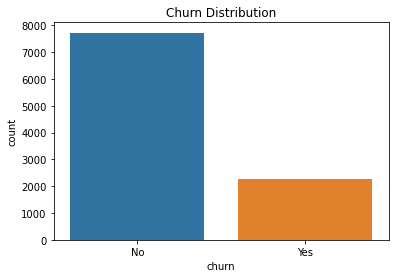

churn Rate: 22.72%


In [10]:
#task2 EDA
import seaborn as sns
import matplotlib.pyplot as plt

# Churn distribution
sns.countplot(x='churn', data=df)
plt.title("Churn Distribution")
plt.show()

# Churn rate
churn_rate = df['churn'].value_counts(normalize=True)['Yes'] * 100
print(f"churn Rate: {churn_rate:.2f}%")


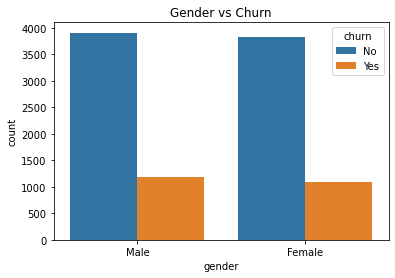

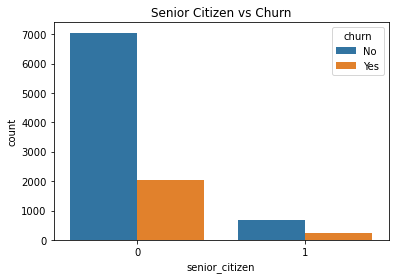

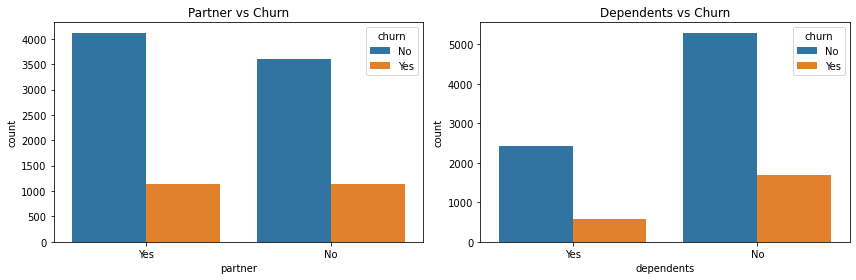

In [11]:
# Demographic Patterns Impact on Churn
# Gender vs Churn
sns.countplot(x='gender', hue='churn', data=df)
plt.title("Gender vs Churn")
plt.show()

# Senior Citizen vs Churn
sns.countplot(x='senior_citizen', hue='churn', data=df)
plt.title("Senior Citizen vs Churn")
plt.show()

# Partner and Dependents vs Churn
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.countplot(ax=axes[0], x='partner', hue='churn', data=df)
axes[0].set_title("Partner vs Churn")
sns.countplot(ax=axes[1], x='dependents', hue='churn', data=df)
axes[1].set_title("Dependents vs Churn")
plt.tight_layout()
plt.show()



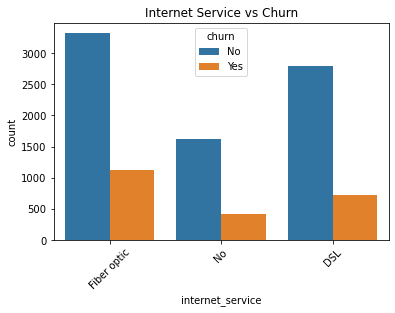

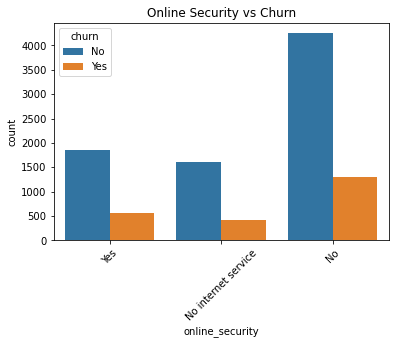

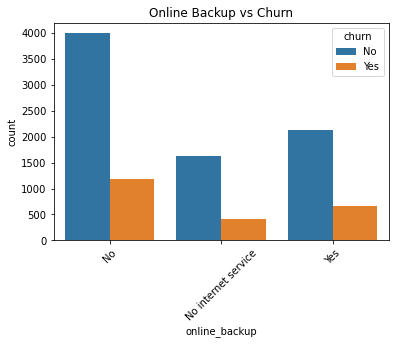

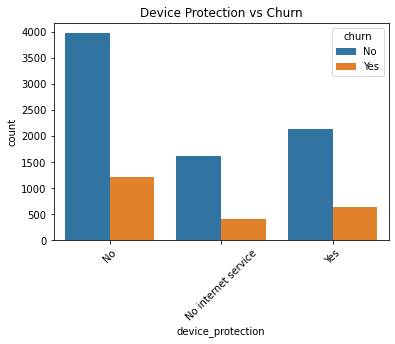

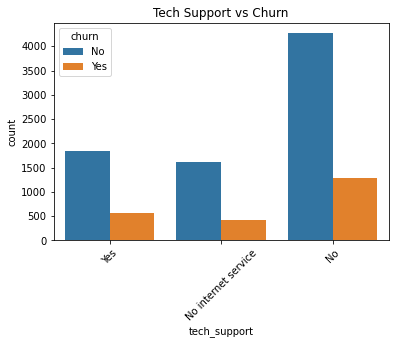

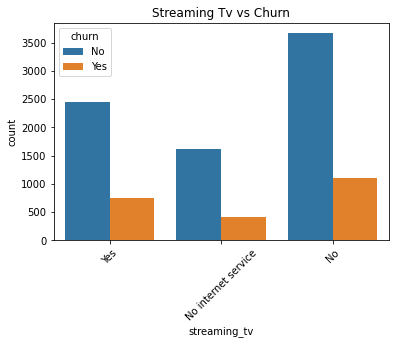

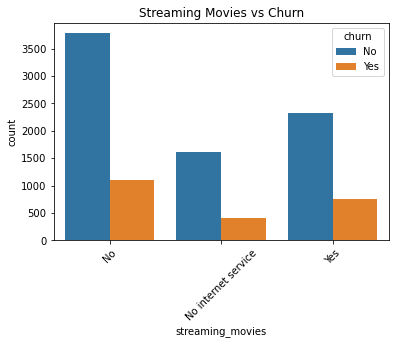

In [12]:
# Service Usage Impact on Churn
service_features = ['internet_service', 'online_security', 'online_backup',
                    'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies']

for feature in service_features:
    sns.countplot(x=feature, hue='churn', data=df)
    plt.title(f"{feature.replace('_', ' ').title()} vs Churn")
    plt.xticks(rotation=45)
    plt.show()


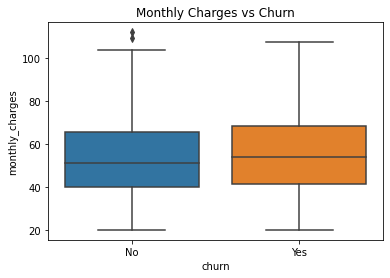

In [13]:
#Monthly Charges vs Churn
sns.boxplot(x='churn', y='monthly_charges', data=df)
plt.title("Monthly Charges vs Churn")
plt.show()


In [14]:
df['total_charges'] = pd.to_numeric(df['total_charges'], errors='coerce')  # handle non-numeric entries


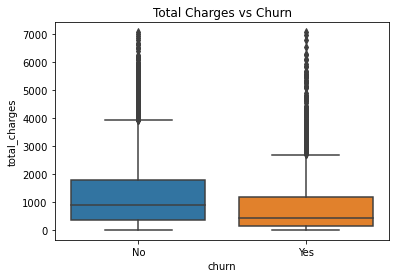

In [15]:
sns.boxplot(x='churn', y='total_charges', data=df)
plt.title("Total Charges vs Churn")
plt.show()


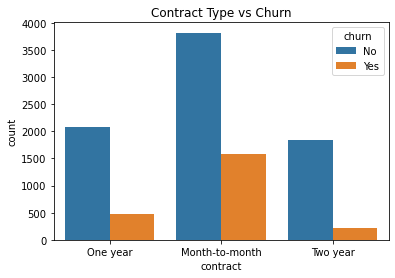

In [16]:
sns.countplot(x='contract', hue='churn', data=df)
plt.title("Contract Type vs Churn")
plt.show()


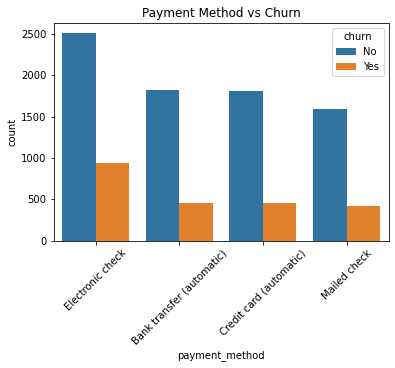

In [17]:
sns.countplot(x='payment_method', hue='churn', data=df)
plt.title("Payment Method vs Churn")
plt.xticks(rotation=45)
plt.show()


In [18]:
#Correlation Analysis for Numerical Features
df['churn_binary'] = df['churn'].map({'Yes': 1, 'No': 0})


In [19]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns


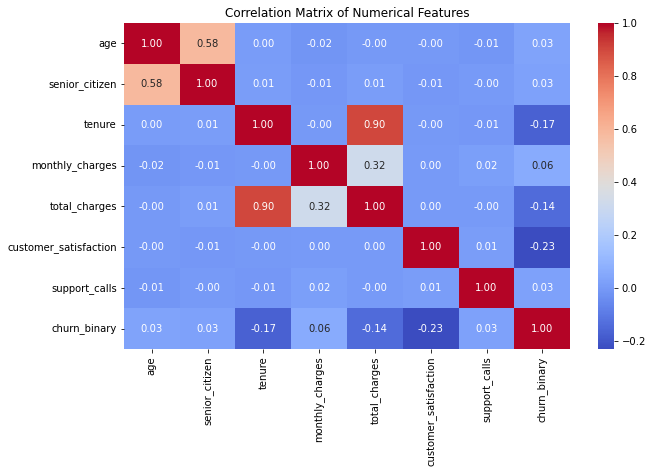

In [20]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[numeric_cols].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix of Numerical Features")
plt.show()


In [21]:
# ================================
# Task 3: Data Preprocessing
# ================================
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
# ================================
# Task 3: Data Preprocessing
# ================================
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# 1. Prepare target variable
df['churn'] = df['churn'].map({'Yes': 1, 'No': 0})  # Binary target

# 2. Separate features and target
X = df.drop(columns=['churn', 'churn_binary'], errors='ignore')  # drop extra churn_binary if exists
y = df['churn']

# 3. Identify numeric and categorical columns
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
print("Numeric features:", numeric_features)
print("Categorical features:", categorical_features)

# 4. Preprocessing for numeric features: impute + scale
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# 5. Preprocessing for categorical features: impute + OneHotEncode
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# 6. Combine preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# 7. Split into train/test (80/20 only)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Numeric features: ['age', 'senior_citizen', 'tenure', 'monthly_charges', 'total_charges', 'customer_satisfaction', 'support_calls']
Categorical features: ['customer_id', 'gender', 'partner', 'dependents', 'phone_service', 'multiple_lines', 'internet_service', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'contract', 'paperless_billing', 'payment_method']
Train shape: (8000, 23)
Test shape: (2000, 23)


In [22]:
# ================================
# Task 4: Model Development
# ================================
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Create pipeline template
def make_pipeline(model):
    return Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', model)])

# Define models and param grids
models = {
    'LogisticRegression': (LogisticRegression(max_iter=1000),
                           {'classifier__C': [0.01, 0.1, 1, 10],
                            'classifier__penalty': ['l2'],
                            'classifier__solver': ['liblinear'],
                            'classifier__class_weight': [None, 'balanced']}),

    'DecisionTree': (DecisionTreeClassifier(random_state=42),
                     {'classifier__max_depth': [None, 5, 10, 20],
                      'classifier__min_samples_split': [2, 10, 20],
                      'classifier__class_weight': [None, 'balanced']}),

    'RandomForest': (RandomForestClassifier(random_state=42, n_jobs=-1),
                     {'classifier__n_estimators': [100, 200],
                      'classifier__max_depth': [None, 10, 20],
                      'classifier__min_samples_split': [2, 10],
                      'classifier__class_weight': [None, 'balanced']}),

    'SVM': (SVC(probability=True),
            {'classifier__C': [0.1, 1, 10],
             'classifier__kernel': ['linear', 'rbf'],
             'classifier__class_weight': [None, 'balanced']})
}

best_models = {}
for name, (model, params) in models.items():
    print(f"\nTuning {name}...")
    pipe = make_pipeline(model)
    grid = GridSearchCV(pipe, params, cv=3, scoring='f1', n_jobs=-1)
    grid.fit(X_train, y_train)
    print("Best params:", grid.best_params_)
    print("Best validation F1:", grid.best_score_)
    best_models[name] = grid.best_estimator_



Tuning LogisticRegression...
Best params: {'classifier__C': 1, 'classifier__class_weight': 'balanced', 'classifier__penalty': 'l2', 'classifier__solver': 'liblinear'}
Best validation F1: 0.49443125906474444

Tuning DecisionTree...
Best params: {'classifier__class_weight': 'balanced', 'classifier__max_depth': 5, 'classifier__min_samples_split': 2}
Best validation F1: 0.49620658454275085

Tuning RandomForest...
Best params: {'classifier__class_weight': 'balanced', 'classifier__max_depth': 10, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 200}
Best validation F1: 0.49691839974446417

Tuning SVM...
Best params: {'classifier__C': 0.1, 'classifier__class_weight': 'balanced', 'classifier__kernel': 'rbf'}
Best validation F1: 0.49409217769668334


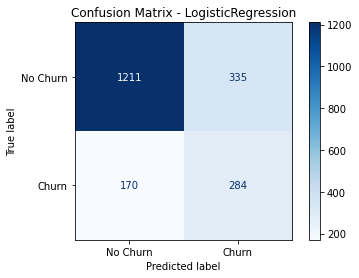

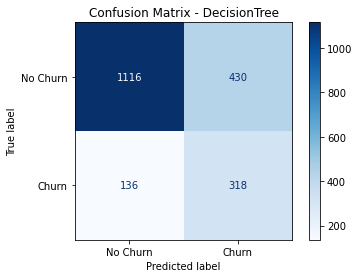

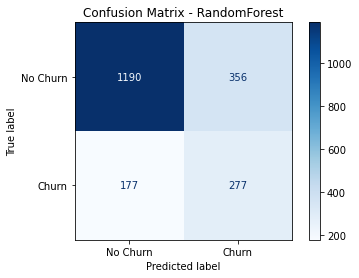

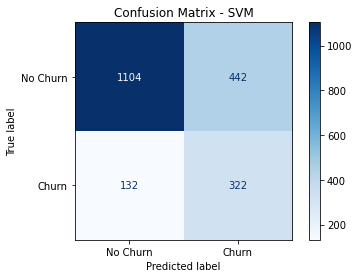


Test Performance of Tuned Models:
                Model  Accuracy  Precision    Recall  F1-score
0  LogisticRegression    0.7475   0.458805  0.625551  0.529357
1        DecisionTree    0.7170   0.425134  0.700441  0.529118
2        RandomForest    0.7335   0.437599  0.610132  0.509660
3                 SVM    0.7130   0.421466  0.709251  0.528736

Best model based on F1-score: LogisticRegression

Final Test Performance of Best Model:
Accuracy : 0.7475
Precision: 0.4588
Recall   : 0.6256
F1-score : 0.5294


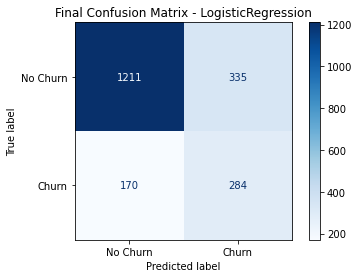

In [24]:
# ================================
# Task 5: Model Evaluation
# ================================
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import pandas as pd
import matplotlib.pyplot as plt

results = []

# 1. Evaluate each tuned model on the test set directly
for name, model in best_models.items():
    y_test_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_test_pred)
    prec = precision_score(y_test, y_test_pred)
    rec = recall_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred)
    
    results.append([name, acc, prec, rec, f1])
    
    # Confusion Matrix for each model
    cm = confusion_matrix(y_test, y_test_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Churn','Churn'])
    disp.plot(cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()

# 2. Summarize test performance
results_df = pd.DataFrame(results, columns=['Model','Accuracy','Precision','Recall','F1-score'])
print("\nTest Performance of Tuned Models:")
print(results_df)

# 3. Select best model by F1-score
best_model_name = results_df.sort_values(by='F1-score', ascending=False).iloc[0]['Model']
print(f"\nBest model based on F1-score: {best_model_name}")

# 4. (Optional) Retrain best model on full data if you want to deploy
best_model = best_models[best_model_name]
best_model.fit(X_train, y_train)  # training again on the same 80% train data

# 5. Final evaluation on test set (already done above, but keeping for clarity)
y_test_pred = best_model.predict(X_test)
test_acc = accuracy_score(y_test, y_test_pred)
test_prec = precision_score(y_test, y_test_pred)
test_rec = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

print("\nFinal Test Performance of Best Model:")
print(f"Accuracy : {test_acc:.4f}")
print(f"Precision: {test_prec:.4f}")
print(f"Recall   : {test_rec:.4f}")
print(f"F1-score : {test_f1:.4f}")

# 6. Confusion matrix for final best model
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Churn','Churn'])
disp.plot(cmap='Blues')
plt.title(f'Final Confusion Matrix - {best_model_name}')
plt.show()
